## Занятие 3
## Математический анализ
## Решение нелинейных уравнений в Sympy. Solve и solveset.
https://docs.sympy.org/latest/modules/solvers/solveset.html

In [41]:
from sympy import Symbol, symbols, S, solve, solveset, Intersection, Interval, EmptySet, Union, Eq 
import sympy
# Продолжим использовать магию
%matplotlib inline

### Задание 1
Решить уравнение $6x^4 + 9x^3 - 99x^2 - 66x + 360 = 0$ с помощью solve и solveset.

In [42]:
x = Symbol('x')
display(solve(6 * (x ** 4) + 9 * (x ** 3) - 99 * (x ** 2) - 66 * x + 360))
display(solveset(6 * (x ** 4) + 9 * (x ** 3) - 99 * (x ** 2) - 66 * x + 360))

[-4, -5/2, 2, 3]

FiniteSet(-4, -5/2, 2, 3)

### Задание 2.
Найти только вещественные решения уравнения $12x^8 + 32x^6 + 21x^4 - 2x^2 - 3 = 0$.

In [43]:
x = Symbol('x', real=True)
display(solve(12 * (x ** 8) + 32 * (x ** 6) + 21 * (x ** 4) - 2 * (x ** 2) - 3))
#or
x = Symbol('x')
display(solveset(12 * (x ** 8) + 32 * (x ** 6) + 21 * (x ** 4) - 2 * (x ** 2) - 3, domain=S.Reals))

[-sqrt(3)/3, sqrt(3)/3]

FiniteSet(-sqrt(3)/3, sqrt(3)/3)

### Задание 3.
Решить уравнение $\log_2(\sin(x))=-1$. 

In [44]:
x = Symbol('x')
solveset(sympy.log(sympy.sin(x), 2) + 1)

Union(ImageSet(Lambda(_n, 2*_n*pi + 5*pi/6), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi/6), Integers))

### Задание 4.
Найти решения уравнения $2{\rm tg}^2(x) - 3{\rm tg}(x) - 5 = 0$ на открытом интервале  $(-5\pi/4, 11\pi/4)$. 

In [45]:
x = Symbol('x')
Intersection(solveset(2 * (sympy.tan(x) ** 2) - 3 * sympy.tan(x) - 5), Interval.open(-5 * sympy.pi / 4, 11 * sympy.pi / 4))

FiniteSet(atan(5/2), -pi/4, 3*pi/4, 7*pi/4, atan(5/2) + pi, -pi + atan(5/2), atan(5/2) + 2*pi)

### Задание 5.
Найти область определения функции $\sqrt{\sin^2 x - 1}$.

In [125]:
def f(x):
  return(sympy.sin(x) ** 2 - 1) #цикл - pi

#display(solveset(f(x) >= 0, domain=S.Reals))

x = Symbol('x')
solutions = solve(f(x))
values = [-pi] #т.к. цикл - pi
for i in range(len(solutions)):
  if (solutions[i] > -pi and solutions[i] < pi):
    values.append(solutions[i])
values.append(pi) #т.к. цикл - pi
for i in range(len(solutions) - 1):
  if (f((solutions[i] + solutions[i + 1]) / 2) < 0):
    print(f"""{solutions[i]} < x < {solutions[i + 1]} => f(x) < 0""")
  else: 
    print(f"""{solutions[i]} < x < {solutions[i + 1]} => f(x) > 0""")

print("\033[95mОбласть определения:")
solveset(f(x))

-pi/2 < x < pi/2 => f(x) < 0
pi/2 < x < 3*pi/2 => f(x) < 0
Область определения:


Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))

### Задание 6.
Найти решение уравнения $\frac{(x^3 + 5 x^2 - 3 x - 15)\ln(x^2 - 3)}{x^2 - 3 x + 2} = 0$. Выполнить проверку подстановкой subs.
#### Указание.
Решение нужно разбить на части. Нужно учесть область определения выражения в левой части уравнения.

In [138]:
def f(f1, f2, f3, x):
  return(f1(x) * f2(x) / f3(x))
def f1(x):
  return((x ** 3) + 5 * (x ** 2) - 3 * x - 15)
def f2(x):
  return(sympy.log(x ** 2 - 3))
def f3(x):
  return(x ** 2 - 3 * x + 2)
def f4(x):
  return(x ** 2 - 3)
x = Symbol('x')
print("\033[95mОтвет:")
display(solveset(f(f1, f2, f3, x)))

#or
print("\033[95mОтвет:")
solutions = solveset(f1(x), domain=S.Reals) + solveset(f2(x), domain=S.Reals) - solveset(f3(x), domain=S.Reals) - solveset(f4(x) <= 0, domain=S.Reals)
display(solutions)

ans = [*solutions]
for i in range(len(ans)):
  print(f"""x = {ans[i]} => f(x) = {f(f1, f2, f3, x).subs(x, ans[i])}""")

#or
display(solveset(f1(x), domain=S.Reals))
display(solveset(f2(x), domain=S.Reals))
display(solveset(f3(x), domain=S.Reals))

answers = [*Union(solveset(f1(x)), solveset(f2(x)))]
ans = []
for i in range(len(answers)):
  if (answers[i] * answers[i] - 3 > 0 and f3(answers[i]) != 0):
    ans.append(answers[i])

print("\033[95mОтвет:")
display(ans)

for i in range(len(ans)):
  print(f"""x = {ans[i]} => f(x) = {f(f1, f2, f3, x).subs(x, ans[i])}""")


Ответ:


FiniteSet(-5, -2)

Ответ:


FiniteSet(-5, -2)

x = -5 => f(x) = 0
x = -2 => f(x) = 0


FiniteSet(-5, sqrt(3), -sqrt(3))

FiniteSet(-2, 2)

FiniteSet(1, 2)

Ответ:


[-5, -2]

x = -5 => f(x) = 0
x = -2 => f(x) = 0


### Индивидуальное задание.
Через все точки пересечения графиков функций $f(x)$ и $g(x)$ провести горизонтальные прямые. Изобразить на графике $f(x)$ зеленым цветом, $g(x)$ красным, горизонтальные линии черным. 
Формулы для $f(x)$ и $g(x)$ включить в легенду.

Вариант 2
\begin{align*}
 f(x) = \frac{x^{2}}{4} + 2 x + 8\\
 g(x) = \frac{3 x^{2}}{2} + 2 x + 3
\end{align*}

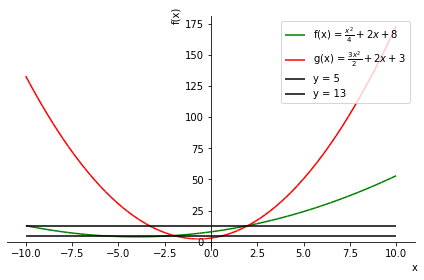

In [139]:
def f(x):
  return((x ** 2) / 4 + 2 * x + 8)
def g(x):
  return(3 * (x ** 2) / 2 + 2 * x + 3)
x = Symbol('x')
answers = [*solveset(f(x) - g(x))]

p = plot(f(x), line_color="green", show=False, legend=True, label='f(x) = ${%s}$' % sympy.latex(f(x)))
p.append(plot(g(x), line_color="red", show=False, label='g(x) = ${%s}$' % sympy.latex(g(x)))[0])
for i in range(len(answers)):
  p.append(plot(f(answers[i]), line_color="black", show=False, label=f"""y = {f(answers[i])}""")[0])
p.show()